In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [5]:
x = [random.uniform(0, 1) for k in range(300)]
y = [random.uniform(0, 1) for k in range(300)]

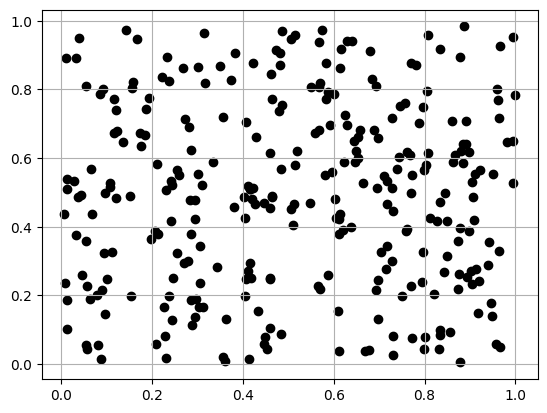

In [6]:
[plt.scatter(x[i], y[i], c="black") for i in range(300)]
plt.grid()
plt.show()

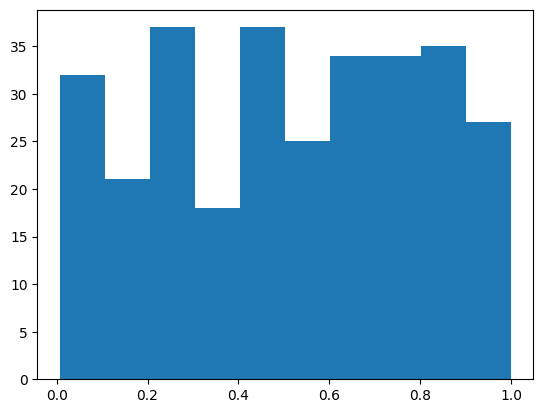

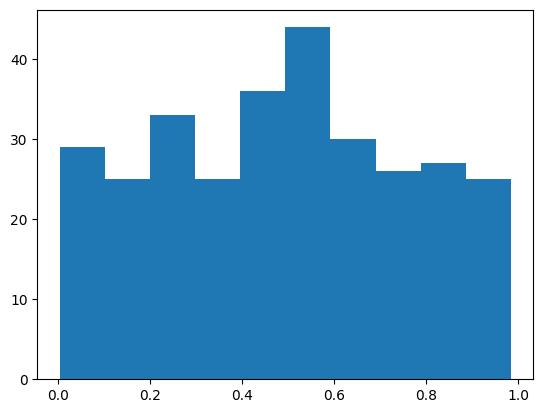

[32. 21. 37. 18. 37. 25. 34. 34. 35. 27.]
[0.0070813  0.10631902 0.20555674 0.30479446 0.40403217 0.50326989
 0.60250761 0.70174532 0.80098304 0.90022076 0.99945848]
<BarContainer object of 10 artists>


In [7]:
nx, binsx, patchesx = plt.hist(x, 10)
plt.show()
ny, binsy, patchesy = plt.hist(y, 10)
plt.show()
print(nx)
print(binsx)
print(patchesx)